### Package import

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from math import ceil, floor

### Set alpha

In [2]:
alpha = 0.05

# Problem 1

### Data setup and dataframe creation.

In [3]:
data = {'Temp': [7, 5, 7, 7, 6, 6, 5, 6, 5, 6, 5, 7, 6, 6, 6],
        'Oil': [4, 3, 3, 2, 4, 3, 3, 2, 4, 2, 2, 3, 3, 3, 4],
        'Time': [90, 105, 105, 90, 105, 90, 75, 105, 90, 75, 90, 75, 90, 90, 75],
        'y': [24, 28, 40, 42, 11, 16, 126, 34, 32, 32, 34, 17, 30, 17, 50]}

df = pd.DataFrame(data)
df = sm.add_constant(df)
df.head()

,const,Temp,Oil,Time,y
0,1.0,7,4,90,24
1,1.0,5,3,105,28
2,1.0,7,3,105,40
3,1.0,7,2,90,42
4,1.0,6,4,105,11


## Problem 1a

In [4]:
df_exog = df[['const', 'Temp', 'Oil', 'Time']]
df_exog = pd.concat([df_exog,
                     df_exog['Temp'] * df_exog['Oil'],
                     df_exog['Temp'] * df_exog['Time'],
                     df_exog['Oil'] * df_exog['Time']], axis = 1)
df_exog = df_exog.rename(columns = {0: 'Temp * Oil',
                                    1: 'Temp * Time',
                                    2: 'Oil * Time'})
df_endog = df['y']

### Full Poisson, *log* link function

In [5]:
model_poisson = sm.GLM(df_endog, df_exog,
                       family = sm.families.Poisson(sm.families.links.log()),
                       alpha = 0.05)
res_poisson = model_poisson.fit()
res_poisson.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Results: Generalized linear model
=============================================================
Model:              GLM              AIC:            129.2872
Link Function:      log              BIC:            15.0506 
Dependent Variable: y                Log-Likelihood: -57.644 
Date:               2021-07-14 09:36 LL-Null:        -146.01 
No. Observations:   15               Deviance:       36.715  
Df Model:           6                Pearson chi2:   38.9    
Df Residuals:       8                Scale:          1.0000  
Method:             IRLS                                     
-------------------------------------------------------------
               Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------
const         24.9964   3.6530  6.8427 0.0000 17.8367 32.1561
Temp          -4.2817   0.5679 -7.5389 0.0000 -5.3948 -3.1685
Oil            2.9898   0.7655  3.9060 0.0001  1.4896  4.4901
Time          -0.2517   0.0373 -6.7444 0.0000 -0.3249 -0.1786
Temp * Oil    -0.1634   0.0903 -1.8089 0.0705 -0.3404  0.0136
Temp * Time    0.0505   0.0057  8.8684 0.0000  0.0393  0.0617
Oil * Time    -0.0242   0.0060 -4.0614 0.0000 -0.0359 -0.0125
=============================================================

"""

Remove any variables where CI includes 0 and p > 0.05, i.e. "Temp * Oil"

### Reduced Poisson, *log* link function

In [6]:
df_exog_2 = df_exog[[i for i in df_exog.columns if i != 'Temp * Oil']]
model_reduced = sm.GLM(df_endog, df_exog_2,
                       family = sm.families.Poisson(sm.families.links.log()),
                       alpha = 0.05)
res_reduced = model_reduced.fit()
res_reduced.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Results: Generalized linear model
=============================================================
Model:              GLM              AIC:            130.5569
Link Function:      log              BIC:            15.6123 
Dependent Variable: y                Log-Likelihood: -59.278 
Date:               2021-07-14 09:36 LL-Null:        -146.01 
No. Observations:   15               Deviance:       39.985  
Df Model:           5                Pearson chi2:   42.5    
Df Residuals:       9                Scale:          1.0000  
Method:             IRLS                                     
-------------------------------------------------------------
               Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------
const         27.9918   3.2634  8.5775 0.0000 21.5957 34.3880
Temp          -4.7708   0.5019 -9.5053 0.0000 -5.7545 -3.7870
Oil            1.9909   0.5249  3.7931 0.0001  0.9621  3.0196
Time          -0.2537   0.0372 -6.8230 0.0000 -0.3265 -0.1808
Temp * Time    0.0506   0.0057  8.9154 0.0000  0.0395  0.0618
Oil * Time    -0.0238   0.0059 -4.0022 0.0001 -0.0355 -0.0121
=============================================================

"""

Remaining variables all show significant impact.

## Problem 1b

In [7]:
disp = res_reduced.deviance / res_reduced.df_model
print('Dispersion (D / df) = {}'.format(round(disp, 2)))

Dispersion (D / df) = 8.0


Likely overdispersion.

## Problem 1c

### Reduced Poisson, *identity* link function

In [8]:
model_poi_id = sm.GLM(df_endog, df_exog_2,
                      family = sm.families.Poisson(sm.families.links.identity()),
                      alpha = 0.05)
res_poi_id = model_poi_id.fit()
res_poi_id.summary2()

/Users/jmiller/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:293: DomainWarning: The identity link function does not respect the domain of the Poisson family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/jmiller/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:293: DomainWarning: The identity link function does not respect the domain of the Poisson family.
  warnings.warn((f"The {type(family.link).__name__} link function "


<class 'statsmodels.iolib.summary2.Summary'>
"""
               Results: Generalized linear model
================================================================
Model:               GLM               AIC:             168.7367
Link Function:       identity          BIC:             53.7920 
Dependent Variable:  y                 Log-Likelihood:  -78.368 
Date:                2021-07-14 09:36  LL-Null:         -146.01 
No. Observations:    15                Deviance:        78.164  
Df Model:            5                 Pearson chi2:    80.1    
Df Residuals:        9                 Scale:           1.0000  
Method:              IRLS                                       
----------------------------------------------------------------
              Coef.   Std.Err.    z    P>|z|    [0.025   0.975] 
----------------------------------------------------------------
const        679.9396 111.2702  6.1107 0.0000  461.8540 898.0251
Temp        -128.2427  16.0021 -8.0141 0.0000 -159.6062 -96.8792
Oil           60.6622  17.1033  3.5468 0.0004   27.1404  94.1839
Time          -6.3492   1.1955 -5.3111 0.0000   -8.6922  -4.0061
Temp * Time    1.3111   0.1734  7.5611 0.0000    0.9712   1.6509
Oil * Time    -0.7166   0.1832 -3.9124 0.0001   -1.0756  -0.3576
================================================================

"""

AIC and BIC are lower for log link, therefore use that.

### Q-Q, histogram, residual plots

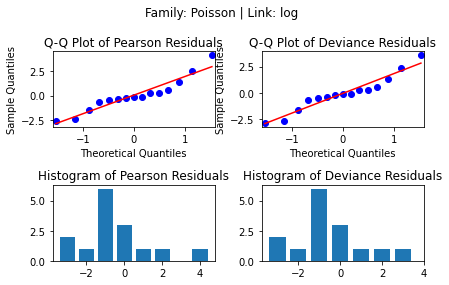

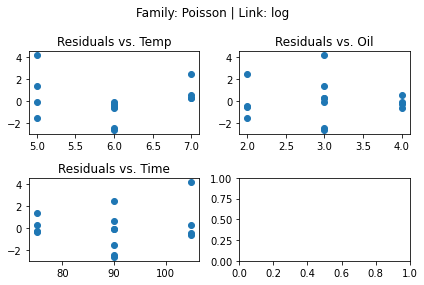

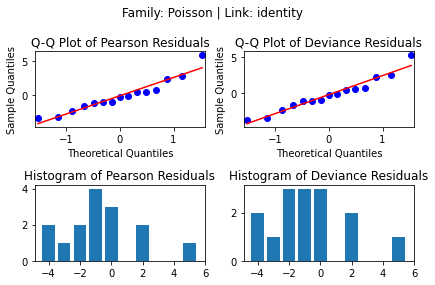

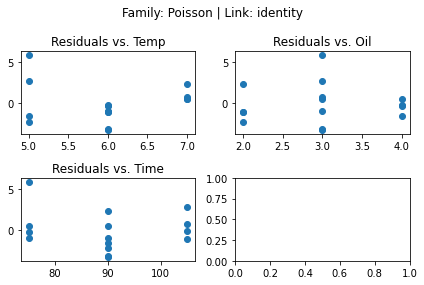

In [9]:
for model in [res_reduced, res_poi_id]:
    model_family = str(model.model.family).split('.')[-1].split(' ')[0]
    model_link = str(model.model.family.link).split('.')[-1].split(' ')[0]
    
    ###########################
    # Q-Q AND HISTOGRAM PLOTS #
    ###########################
    fig, ax = plt.subplots(2, 2)

    sm.qqplot(model.resid_pearson, line = 'r', ax = ax[0, 0])
    ax[0, 0].set_title('Q-Q Plot of Pearson Residuals')

    sm.qqplot(model.resid_deviance, line = 'r', ax = ax[0, 1])
    ax[0, 1].set_title('Q-Q Plot of Deviance Residuals')

    pearson_min_bin = floor(min(model.resid_pearson))
    pearson_max_bin = ceil(max(model.resid_pearson)) + 1
    ax[1, 0].hist(model.resid_pearson,
                  bins = range(pearson_min_bin, pearson_max_bin),
                  rwidth = 0.8,
                  align = 'left')
    ax[1, 0].set_xticks([i for i in range(pearson_min_bin, pearson_max_bin)
                         if i % 2 == 0])
    ax[1, 0].set_title('Histogram of Pearson Residuals')

    deviance_min_bin = floor(min(model.resid_deviance))
    deviance_max_bin = ceil(max(model.resid_deviance)) + 1
    ax[1, 1].hist(model.resid_deviance,
                  bins = range(deviance_min_bin, deviance_max_bin),
                  rwidth = 0.8,
                  align = 'left')
    ax[1, 1].set_xticks([i for i in range(deviance_min_bin, deviance_max_bin)
                         if i % 2 == 0])
    ax[1, 1].set_title('Histogram of Deviance Residuals')

    fig_title = 'Family: {} | Link: {}'.format(model_family, model_link)
    fig.suptitle(fig_title)
    plt.tight_layout()
    plt.show()

    ##########################
    # RESIDUALS VS VARIABLES #
    ##########################
    fig, ax = plt.subplots(2, 2)

    sorted_temp = sorted(list(zip(df['Temp'], model.resid_pearson)))
    sorted_temp_x = [i[0] for i in sorted_temp]
    sorted_temp_y = [i[1] for i in sorted_temp]

    ax[0, 0].scatter(sorted_temp_x, sorted_temp_y)
    ax[0, 0].set_title('Residuals vs. Temp')

    sorted_oil = sorted(list(zip(df['Oil'], model.resid_pearson)))
    sorted_oil_x = [i[0] for i in sorted_oil]
    sorted_oil_y = [i[1] for i in sorted_oil]

    ax[0, 1].scatter(sorted_oil_x, sorted_oil_y)
    ax[0, 1].set_title('Residuals vs. Oil')

    sorted_time = sorted(list(zip(df['Time'], model.resid_pearson)))
    sorted_time_x = [i[0] for i in sorted_time]
    sorted_time_y = [i[1] for i in sorted_time]

    ax[1, 0].scatter(sorted_time_x, sorted_time_y)
    ax[1, 0].set_title('Residuals vs. Time')

    fig_title = 'Family: {} | Link: {}'.format(model_family, model_link)
    fig.suptitle(fig_title)
    plt.tight_layout()
    plt.show()

Nothing stands out as abnormal in any of these plots, therefore either model likely ok to use for this analysis.

# Problem 2

Data setup and dataframe creation.

In [10]:
data = {'bath_temperature': [248, 248, 248, 248, 248, 248, 248, 248, 248,
                             252, 252, 252, 252, 252, 252, 252, 252, 252],
        'wave_height': [4.38, 4.38, 4.38, 4.4, 4.4, 4.4, 4.42, 4.42, 4.42,
                        4.38, 4.38, 4.38, 4.4, 4.4, 4.4, 4.42, 4.42, 4.42],
        'overhead_preheater': [340, 360, 380, 340, 360, 380, 360, 380, 380,
                               340, 360, 380, 340, 360, 380, 340, 360, 380],
        'preheater_1': [340, 360, 380, 360, 380, 340, 340, 360, 340,
                        380, 340, 360, 360, 380, 340, 380, 340, 360],
        'preheater_2': [340, 360, 380, 360, 380, 340, 340, 360, 380,
                        380, 340, 360, 380, 340, 360, 360, 380, 340],
        'air_knife': [0, 3, 6, 3, 6, 0, 6, 0, 3, 3, 6, 0, 0, 3, 6, 6, 0, 3],
        'overhead_vibration': [0, 2, 4, 4, 0, 2, 2, 4, 0,
                               2, 4, 0, 4, 0, 2, 0, 2, 4],
        'y': [4, 2, 1, 2, 6, 15, 9, 5, 8, 5, 4, 11, 10, 15, 4, 12, 6, 7]}

df = pd.DataFrame(data)
df = sm.add_constant(df)
df.head()

,const,bath_temperature,wave_height,overhead_preheater,preheater_1,preheater_2,air_knife,overhead_vibration,y
0,1.0,248,4.38,340,340,340,0,0,4
1,1.0,248,4.38,360,360,360,3,2,2
2,1.0,248,4.38,380,380,380,6,4,1
3,1.0,248,4.40,340,360,360,3,4,2
4,1.0,248,4.40,360,380,380,6,0,6


## Problem 2a

In [11]:
df_exog = df[['const', 'bath_temperature', 'wave_height', 'overhead_preheater',
              'preheater_1', 'preheater_2', 'air_knife', 'overhead_vibration']]
df_endog = df['y']

### Normal, identity link function

In [12]:
model_glm = sm.GLM(df_endog, df_exog,
                   family = sm.families.Gaussian(sm.families.links.identity()),
                   alpha = 0.05)
res_glm = model_glm.fit()
res_glm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Generalized linear model
========================================================================
Model:                   GLM                 AIC:               101.4445
Link Function:           identity            BIC:               92.5351 
Dependent Variable:      y                   Log-Likelihood:    -42.722 
Date:                    2021-07-14 09:36    LL-Null:           -51.611 
No. Observations:        18                  Deviance:          121.44  
Df Model:                7                   Pearson chi2:      121.    
Df Residuals:            10                  Scale:             12.144  
Method:                  IRLS                                           
------------------------------------------------------------------------
                     Coef.   Std.Err.    z    P>|z|    [0.025    0.975] 
------------------------------------------------------------------------
const              -527.4145 247.9185 -2.1274 0.0334 -1013.3259 -41.5031
bath_temperature      0.5667   0.4184  1.3546 0.1756    -0.2533   1.3868
wave_height          89.9889  51.7073  1.7404 0.0818   -11.3555 191.3333
overhead_preheater    0.0287   0.0533  0.5380 0.5905    -0.0758   0.1331
preheater_1           0.0686   0.0589  1.1653 0.2439    -0.0468   0.1840
preheater_2          -0.0955   0.0539 -1.7720 0.0764    -0.2011   0.0101
air_knife            -0.5310   0.3494 -1.5198 0.1286    -1.2158   0.1538
overhead_vibration   -1.0917   0.5065 -2.1552 0.0311    -2.0845  -0.0989
========================================================================

"""

### Full Poisson, identity link function

In [13]:
model_poisson = sm.GLM(df_endog, df_exog,
                       family = sm.families.Poisson(sm.families.links.identity()),
                       alpha = 0.05)
res_poisson = model_poisson.fit()
res_poisson.summary2()

/Users/jmiller/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:293: DomainWarning: The identity link function does not respect the domain of the Poisson family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/jmiller/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:293: DomainWarning: The identity link function does not respect the domain of the Poisson family.
  warnings.warn((f"The {type(family.link).__name__} link function "


<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Generalized linear model
========================================================================
Model:                   GLM                 AIC:               97.1260 
Link Function:           identity            BIC:               -12.7365
Dependent Variable:      y                   Log-Likelihood:    -40.563 
Date:                    2021-07-14 09:36    LL-Null:           -54.793 
No. Observations:        18                  Deviance:          16.167  
Df Model:                7                   Pearson chi2:      16.9    
Df Residuals:            10                  Scale:             1.0000  
Method:                  IRLS                                           
------------------------------------------------------------------------
                     Coef.   Std.Err.    z    P>|z|    [0.025    0.975] 
------------------------------------------------------------------------
const              -610.2714 183.0321 -3.3342 0.0009 -969.0077 -251.5351
bath_temperature      0.6998   0.2888  2.4230 0.0154    0.1337    1.2659
wave_height          99.3022  37.2052  2.6690 0.0076   26.3814  172.2231
overhead_preheater    0.0400   0.0352  1.1376 0.2553   -0.0290    0.1090
preheater_1           0.0682   0.0461  1.4795 0.1390   -0.0221    0.1585
preheater_2          -0.0838   0.0434 -1.9316 0.0534   -0.1689    0.0012
air_knife            -0.5059   0.2562 -1.9749 0.0483   -1.0080   -0.0038
overhead_vibration   -0.9059   0.3521 -2.5728 0.0101   -1.5960   -0.2158
========================================================================

"""

Remove any variables where CI includes 0 and p > 0.05, i.e. overhead_preheater, preheater_1, preheater_2

### Reduced Poisson, identity link function

In [14]:
df_exog_reduced = df_exog[['const', 'bath_temperature', 'wave_height',
                           'air_knife', 'overhead_vibration']]
model_poi_reduced = sm.GLM(df_endog, df_exog_reduced,
                           family = sm.families.Poisson(
                               sm.families.links.identity()),
                           alpha = 0.05)
res_poi_reduced = model_poi_reduced.fit()
res_poi_reduced.summary2()

/Users/jmiller/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:293: DomainWarning: The identity link function does not respect the domain of the Poisson family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/jmiller/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:293: DomainWarning: The identity link function does not respect the domain of the Poisson family.
  warnings.warn((f"The {type(family.link).__name__} link function "


<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Generalized linear model
========================================================================
Model:                   GLM                 AIC:               95.8069 
Link Function:           identity            BIC:               -16.7267
Dependent Variable:      y                   Log-Likelihood:    -42.903 
Date:                    2021-07-14 09:36    LL-Null:           -54.793 
No. Observations:        18                  Deviance:          20.848  
Df Model:                4                   Pearson chi2:      22.3    
Df Residuals:            13                  Scale:             1.0000  
Method:                  IRLS                                           
------------------------------------------------------------------------
                     Coef.   Std.Err.    z    P>|z|    [0.025    0.975] 
------------------------------------------------------------------------
const              -543.6999 164.2827 -3.3095 0.0009 -865.6880 -221.7117
bath_temperature      0.6333   0.2787  2.2724 0.0231    0.0871    1.1796
wave_height          89.8949  35.3360  2.5440 0.0110   20.6376  159.1522
air_knife            -0.3881   0.2358 -1.6456 0.0998   -0.8503    0.0741
overhead_vibration   -1.0025   0.3546 -2.8270 0.0047   -1.6976   -0.3075
========================================================================

"""

Both Poisson are similar in AIC/BIC, with reduced Poisson being slightly better performance. Normal distribution much larger.

## Problem 2b

In [15]:
for i in [res_glm, res_poisson, res_poi_reduced]:
    if i == res_glm:
        family = 'GLM'
    elif i == res_poisson:
        family = 'Poisson'
    elif i == res_poi_reduced:
        family = 'Reduced Poisson'

    param = round(i.params['wave_height'], 2)
    conf_int_lo = round(i.conf_int().loc['wave_height'][0], 2)
    conf_int_hi = round(i.conf_int().loc['wave_height'][1], 2)
    p_val = round(i.pvalues['wave_height'], 5)
    print('-- {} --\nParam: {} | C Int: [{} {}] | p: {}'.
          format(family,
                 param,
                 conf_int_lo,
                 conf_int_hi,
                 p_val))
    if (conf_int_lo < 0 and conf_int_hi > 0) or p_val > alpha:
        sig = 'Not Significant'
    else:
        sig = 'Significant'
    print('"b" value is: {}\n'.format(sig))

-- GLM --
Param: 89.99 | C Int: [-11.36 191.33] | p: 0.0818
"b" value is: Not Significant

-- Poisson --
Param: 99.3 | C Int: [26.38 172.22] | p: 0.00761
"b" value is: Significant

-- Reduced Poisson --
Param: 89.89 | C Int: [20.64 159.15] | p: 0.01096
"b" value is: Significant



## Problem 2c

In [16]:
model_family = 'Reduced Poisson'
model_link = 'Identity'

### Q-Q, histogram plots

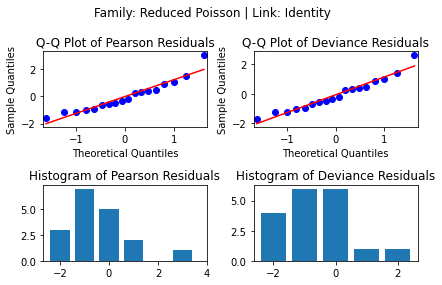

In [17]:
fig, ax = plt.subplots(2, 2)

sm.qqplot(res_poi_reduced.resid_pearson, line = 'r', ax = ax[0, 0])
ax[0, 0].set_title('Q-Q Plot of Pearson Residuals')

sm.qqplot(res_poi_reduced.resid_deviance, line = 'r', ax = ax[0, 1])
ax[0, 1].set_title('Q-Q Plot of Deviance Residuals')

pearson_min_bin = floor(min(res_poi_reduced.resid_pearson))
pearson_max_bin = ceil(max(res_poi_reduced.resid_pearson)) + 1
ax[1, 0].hist(res_poi_reduced.resid_pearson,
              bins = range(pearson_min_bin, pearson_max_bin),
              rwidth = 0.8,
              align = 'left')
ax[1, 0].set_xticks([i for i in range(pearson_min_bin, pearson_max_bin)
                     if i % 2 == 0])
ax[1, 0].set_title('Histogram of Pearson Residuals')

deviance_min_bin = floor(min(res_poi_reduced.resid_deviance))
deviance_max_bin = ceil(max(res_poi_reduced.resid_deviance)) + 1
ax[1, 1].hist(res_poi_reduced.resid_deviance,
              bins = range(deviance_min_bin, deviance_max_bin),
              rwidth = 0.8,
              align = 'left')
ax[1, 1].set_xticks([i for i in range(deviance_min_bin, deviance_max_bin)
                     if i % 2 == 0])
ax[1, 1].set_title('Histogram of Deviance Residuals')

fig_title = 'Family: {} | Link: {}'.format(model_family, model_link)
fig.suptitle(fig_title)
plt.tight_layout()
plt.show()

### Residual plots

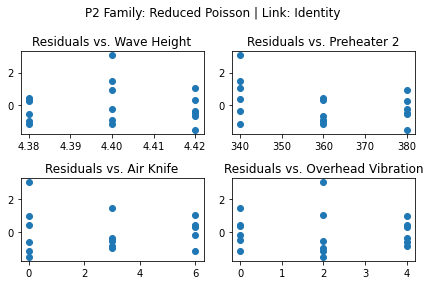

In [18]:
fig, ax = plt.subplots(2, 2)

sorted_wave_height = sorted(list(zip(df['wave_height'],
                                     res_poi_reduced.resid_pearson)))
sorted_wave_height_x = [i[0] for i in sorted_wave_height]
sorted_wave_height_y = [i[1] for i in sorted_wave_height]

ax[0, 0].scatter(sorted_wave_height_x, sorted_wave_height_y)
ax[0, 0].set_title('Residuals vs. Wave Height')

sorted_preheater_2 = sorted(list(zip(df['preheater_2'],
                                     res_poi_reduced.resid_pearson)))
sorted_preheater_2_x = [i[0] for i in sorted_preheater_2]
sorted_preheater_2_y = [i[1] for i in sorted_preheater_2]

ax[0, 1].scatter(sorted_preheater_2_x, sorted_preheater_2_y)
ax[0, 1].set_title('Residuals vs. Preheater 2')

sorted_air_knife = sorted(list(zip(df['air_knife'],
                                   res_poi_reduced.resid_pearson)))
sorted_air_knife_x = [i[0] for i in sorted_air_knife]
sorted_air_knife_y = [i[1] for i in sorted_air_knife]

ax[1, 0].scatter(sorted_air_knife_x, sorted_air_knife_y)
ax[1, 0].set_title('Residuals vs. Air Knife')

sorted_overhead_vibration = sorted(list(zip(df['overhead_vibration'],
                                            res_poi_reduced.resid_pearson)))
sorted_overhead_vibration_x = [i[0] for i in sorted_overhead_vibration]
sorted_overhead_vibration_y = [i[1] for i in sorted_overhead_vibration]

ax[1, 1].scatter(sorted_overhead_vibration_x, sorted_overhead_vibration_y)
ax[1, 1].set_title('Residuals vs. Overhead Vibration')

fig_title = 'P2 Family: {} | Link: {}'.format(model_family, model_link)
fig.suptitle(fig_title)
plt.tight_layout()
plt.show()

### Parameter value to minimize response

In [19]:
for i in df.columns:
    if i in ['const', 'y']:
        continue
    means = df.groupby([i]).mean()['y']
    print('-- {} --\nMinimize at: {}\n'.format(i, means.idxmin()))

-- bath_temperature --
Minimize at: 248

-- wave_height --
Minimize at: 4.38

-- overhead_preheater --
Minimize at: 340

-- preheater_1 --
Minimize at: 360

-- preheater_2 --
Minimize at: 360

-- air_knife --
Minimize at: 6

-- overhead_vibration --
Minimize at: 4

